/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL
===========iteration:0===========
std=0.01:2.3024838999718433
Xavier:2.306523769170788
He:2.3076792572571323
===========iteration:100===========
std=0.01:2.3019588081765403
Xavier:2.2437526857050836
He:1.1900954819557543
===========iteration:200===========
std=0.01:2.3028113401912034
Xavier:2.1713245650275472
He:0.8490564489704396
===========iteration:300===========
std=0.01:2.3025332310373487
Xavier:1.8186137358985517
He:0.3958856289585224
===========iteration:400===========
std=0.01:2.3029719583805446
Xavier:1.30772370235154
He:0.352980972884568
===========iteration:500===========
std=0.01:2.303127306627584
Xavier:0.9153680932924572
He:0.3812730846192123
===========iteration:600===========
std=0.01:2.302252711659465
Xavier:0.6402559485671582
He:0.3489880790534403
===========iteration:700===========
std=0.01:2.300767838439609
Xavier:0.5

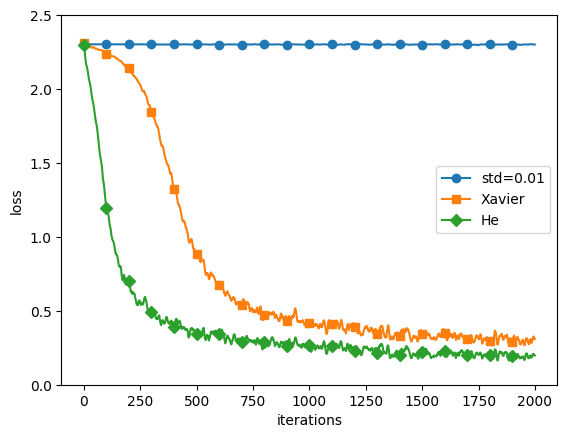

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()
